## Inaugural Project

This project investigates an exchange economy model featuring two individuals, A and B, and two commodities, x1 and x2. We start by depicting the Pareto improvement set within an Edgeworth box framework. Following this, we tackle a series of optimization challenges to identify market-clearing prices and optimal allocations that enhance utility under different constraints. Lastly, we consider scenarios with random initial endowments and scrutinize the ensuing market equilibrium allocations.

**Imports**

In [7]:
#we start of by importing
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, minimize
from inauguralproject import ExchangeEconomyClass




**Question 1** 
In this exercise, we demonstrate the set of Pareto improvements within an Edgeworth box. These improvements represent combinations of allocations that ensure both consumers are at least as well off as they were with their initial endowments.


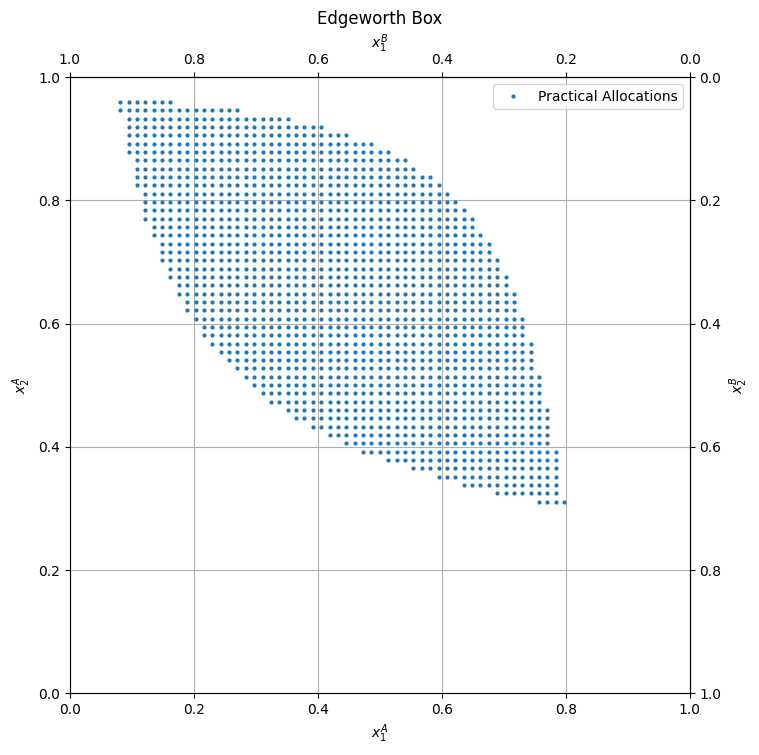

In [3]:
economy = ExchangeEconomyClass()
par = economy.par

# Find the initial utilities
initial_utility_A = economy.utility_A(par.w1A, par.w2A)
initial_utility_B = economy.utility_B(1 - par.w1A, 1 - par.w2A)


w1bar = 1.0
w2bar = 1.0

# We use N as spicifed in the task
N = 75
x1A_values = np.linspace(0, w1bar, N)
x2A_values = np.linspace(0, w2bar, N)


Practical_x1A = []
Practical_x2A = []

# we here check for the allcoations 
for x1A in x1A_values:
    for x2A in x2A_values:
        utility_A = economy.utility_A(x1A, x2A)
        utility_B = economy.utility_B(w1bar - x1A, w2bar - x2A)
        if utility_A >= initial_utility_A and utility_B >= initial_utility_B:
            Practical_x1A.append(x1A)
            Practical_x2A.append(x2A)

# Convert the list to a numpy array for plotting
feasible_allocations = np.column_stack((Practical_x1A, Practical_x2A))


# Plotting the Edgeworth box
plt.figure(figsize=(8, 8))
plt.plot(feasible_allocations[:, 0], feasible_allocations[:, 1], 'o', markersize=2, label='Practical Allocations')
plt.xlim((0.0, 1.0))
plt.ylim((0.0, 1.0))
plt.xlabel('$x_1^A$')
plt.ylabel('$x_2^A$')
plt.title('Edgeworth Box')
plt.grid(True)
plt.legend()

# Adding secondary x-axis with half the ticks and labels
secax_x = plt.gca().secondary_xaxis('top')
secax_x.set_xticks(np.round(np.arange(0, 1.1, 0.2), 2))
secax_x.set_xlabel('$x_1^B$')
secax_x.set_xticklabels(np.round(np.arange(1, -0.1, -0.2), 1))

# Adding secondary y-axis with half the ticks and labels
secax_y = plt.gca().secondary_yaxis('right')
secax_y.set_yticks(np.round(np.arange(0, 1.1, 0.2), 2))
secax_y.set_ylabel('$x_2^B$')
secax_y.set_yticklabels(np.round(np.arange(1, -0.1, -0.2), 1))

plt.show()

The diagram above illustrates the Edgeworth box, featuring the initial endowment and the range of Pareto improvements. The blue points mark allocations that qualify as Pareto improvements, meaning both consumers are as well off, if not better, compared to their initial endowments.

**Question 2**
In this analysis, we examine the relationship between market clearing errors for two goods and the varying price of good 1 (p1). Market equilibrium is achieved when demand equals supply at the market clearing price, p1. If the price deviates from p1, it results in excess demand, quantified by epsilon1 and epsilon2 for goods 1 and 2, respectively. We calculate these excess demands over a range of prices, identifying this as the "error in the market clearing condition," and visualize the errors using a graph.

When the price of good 1 increases, excess demand decreases, eventually leading to excess supply if it becomes negative. Conversely, an increase in the price of good 1 causes the excess demand for good 2 to rise, as consumers shift towards the relatively cheaper good 2. The intersection of the excess demand curves for both goods indicates the market clearing price, found in question 3, where both excess demands are zero, signifying equilibrium. The following code computes and graphs these excess demands:

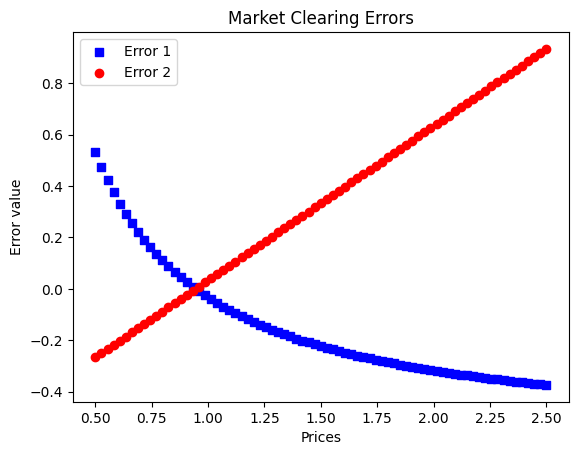

In [4]:
# 2)
#Generates an array of N evenly spaced prices. 
#These prices will be used to assess how the market clearing error changes as the price varies within this range.
p_values = np.linspace(0.5, 2.5, N)

ErrorList1 = []
ErrorList2 = []
# for the for loop. 
#Calls economy.check_market_clearing(price), which is a method expected to calculate and return two types of market clearing errors at the given price.
for price in p_values:
    error1, error2 = economy.check_market_clearing(price)
    ErrorList1.append(error1)
    ErrorList2.append(error2)

# Plots the data points on a scatter plot with the prices on the x-axis and the market clearing errors on the y-axis.
plt.scatter(p_values, ErrorList1, marker='s', color='blue', label='Error 1')
plt.scatter(p_values, ErrorList2, marker='o', color='red', label='Error 2')
plt.xlabel('Prices')
plt.ylabel('Error value')
plt.title('Market Clearing Errors')
plt.legend()
plt.show()

The analysis illustrates how market clearing errors fluctuate with varying prices for good 1. Determining the price that minimizes these errors allows us to pinpoint the equilibrium price where the market clears efficiently. This study sheds light on the interaction between consumer preferences and endowments in shaping market outcomes within the Edgeworth Box framework.

**Question 3**

We now determine the market clearing price, as discussed in question 2, where it is identified at the graphical intersection of the two excess demand curves. The market clearing price for p1 is found to be 0.95. Consequently, the relative price of p1/p2 is also 0.95, given that p2 is set as the numeraire (p2=1). The following code is used to calculate the market clearing price:

In [5]:
#Making a combined market error 
combined_error = np.array(ErrorList1) + np.array(ErrorList2)
min_error_index = np.argmin(combined_error)
optimal_price = p_values[min_error_index]

# This segment identifies the price that minimizes the total market clearing error and uses it to find the most favorable demand and associated utility for both agents in the market
demand_A_optimal = economy.demand_A(optimal_price)
demand_B_optimal = economy.demand_B(optimal_price)
utility_A_optimal = economy.utility_A(*demand_A_optimal)
utility_B_optimal = economy.utility_B(*demand_B_optimal)

# Display results
print(f'optimal price is: {optimal_price}')
print(f'allocation for A is: ({demand_A_optimal[0]}, {demand_A_optimal[1]})')
print(f'allocation for B is: ({demand_B_optimal[0]}, {demand_B_optimal[1]})')
print(f'utility for A: {utility_A_optimal}')
print(f'utility for B: {utility_B_optimal}')
print(f'Total utility : {utility_A_optimal + utility_B_optimal}')

optimal price is: 0.9594594594594594
allocation for A is: (0.37089201877934275, 0.7117117117117118)
allocation for B is: (0.6197183098591549, 0.2972972972972973)
utility for A: 0.5727326005035266
utility for B: 0.485131944094543
Total utility : 1.0578645445980697


**Question 4.a**
In this scenario, individual A is the price-setter, aiming to maximize their own utility. Initially, we assume that any price can be set for P1. We find that A chooses an optimal price of approximately 0.96. This results in an allocation where A consumes approximately 0.37 units of good 1 and 0.71 units of good 2, while consumer B consumes approximately 0.62 units of good 1 and 0.30 units of good 2. The utility for A is approximately 0.57, for B it is approximately 0.49, and the total utility is approximately 1.06.

In [6]:
#4.a
#Generate a sequence of potential market prices within the given range for analysis.
def calculate_utility_and_allocations(economy, N=75):
    # Generate a range of prices
    p_values = np.linspace(0.5, 2.5, N)
    utility_list_A = []

    epsilon = 1e-8  # Small value to prevent invalid power operations

    # Calculate utility for agent A across a range of prices
    for price in p_values:
        # Calculate consumer B's demand for both goods at the given price
        x1B, x2B = economy.demand_B(price)
        
        # Derive consumer A's allocation as the residual of total endowment after B's demand
        x1A, x2A = 1 - x1B, 1 - x2B
        
        # Ensure allocations are positive
        x1A = max(x1A, epsilon)
        x2A = max(x2A, epsilon)
        
        # Calculate consumer A's utility
        utilityA = economy.utility_A(x1A, x2A)
        utility_list_A.append(utilityA)

    # Convert lists to NumPy arrays
    p_values_array = np.array(p_values)
    utility_list_A_array = np.array(utility_list_A)

    # Filter out non-feasible utility values
    feasible_util = ~np.isnan(utility_list_A_array)
    filtered_utilities = utility_list_A_array[feasible_util]
    filtered_p_values = p_values_array[feasible_util]

    # Find the index of the maximum utility
    max_utility_index = np.argmax(filtered_utilities)
    optimal_price = filtered_p_values[max_utility_index]

    # Determine market equilibrium allocations for both consumers using the optimal price
    Allocation_x1B, Allocation_x2B = economy.demand_B(optimal_price)
    Allocation_x1A, Allocation_x2A = 1 - Allocation_x1B, 1 - Allocation_x2B

    return optimal_price, (Allocation_x1A, Allocation_x2A), (Allocation_x1B, Allocation_x2B)


optimal_price, allocation_A, allocation_B = calculate_utility_and_allocations(economy)
print(f'Optimal price: {optimal_price}')
print(f'Allocation for A: {allocation_A}')
print(f'Allocation for B: {allocation_B}')


Optimal price: 1.9054054054054055
Allocation for A: (0.6217494089834517, 0.6396396396396397)
Allocation for B: (0.37825059101654834, 0.36036036036036034)


**Question 4.b**
 we consider the more realistic scenario where the price must be strictly positive. We find that A selects a positive price of approximately 1.91. This leads to an allocation where A consumes approximately 0.62 units of good 1 and 0.64 units of good 2, while B consumes approximately 0.38 units of good 1 and 0.36 units of good 2. To determine the allocation for question 4.b, we have used the following code:

In [6]:
#4.b
# Define a function to calculate the negative utility of consumer A.
# This function is used for optimization since 'minimize' seeks to minimize the function, and we are interested in maximizing utility.
def new_utility_A(price, economy):
    # Retrieve the demand of consumer B given the price and then calculate consumer A's remaining allocation.
    x1B, x2B = economy.demand_B(price)
    x1A, x2A = 1 - x1B, 1 - x2B
    return -economy.utility_A(x1A, x2A)  # Return the negative utility of A for the optimizer to minimize.

def calculate_optimal_price_and_allocations(initial_price, price_bounds, economy):
    # Run the optimization to find the price that maximizes consumer A's utility.
    result = minimize(new_utility_A, initial_price, bounds=price_bounds, args=(economy,))

    # Extract the optimal price from the optimization result.
    optimal_price = result.x[0]

    # Calculate the optimal allocations for consumer A and B using the optimal price.
    Allocation_x1B, Allocation_x2B = economy.demand_B(optimal_price)
    Allocation_x1A, Allocation_x2A = 1 - Allocation_x1B, 1 - Allocation_x2B

    return optimal_price, (Allocation_x1A, Allocation_x2A), (Allocation_x1B, Allocation_x2B)

# Example usage:
initial_price = [1.0]  # Initial guess for the optimizer
price_bounds = [(0, None)]  # Bounds indicate that price should be between 0 and infinity
optimal_price, allocation_A, allocation_B = calculate_optimal_price_and_allocations(initial_price, price_bounds, economy)

# Output the results: the optimal price and corresponding allocations for consumers A and B.
print(f'The chosen price will be: {optimal_price}')
print(f'Allocation for A: {allocation_A}')
print(f'Allocation for B: {allocation_B}')
print(f'Utility for A: {economy.utility_A(*allocation_A)}')
print(f'Utility for B: {economy.utility_B(*allocation_B)}')
print(f'Total utility: {economy.utility_A(*allocation_A) + economy.utility_B(*allocation_B)}')


The chosen price will be: 1.8992871839426273
Allocation for A: (0.6209604508757831, 0.6400475210704915)
Allocation for B: (0.37903954912421683, 0.3599524789295085)
Utility for A: 0.6336208505887345
Utility for B: 0.3725673054168594
Total utility: 1.0061881560055939


**Question 5a**
In this problem, we assume that the consumptions of agents A and B are chosen by a utilitarian social planner to maximize aggregate utility. The objective is to maximize the sum of the utilities for both agents A and B, subject to the constraint that the total consumption of each good must not exceed the total endowment of 1 unit per good.

In [7]:
#5a
# Pair up feasible allocations of goods x1 and x2 for consumer A into a list of tuples.
Practical_allocations = list(zip(Practical_x1A, Practical_x2A))
feasible_utilities_A = []

# Evaluate the utility of consumer A for each feasible pair of goods and store the utilities.
for allocation in Practical_allocations:
    utility_A = economy.utility_A(*allocation)  # Calculate utility for the current allocation
    feasible_utilities_A.append(utility_A)

# Find the highest utility value from the list of feasible utilities and identify the corresponding allocation.
Optimal_utility = max(feasible_utilities_A)
Optimal_utility_index = feasible_utilities_A.index(Optimal_utility)
Optimal_allocation = feasible_allocations[Optimal_utility_index] # The allocation corresponding to the maximum utility

# Output the best allocation for consumer A and the maximum utility achieved by this allocation.
print(f'allocation for A : ({Optimal_allocation[0]}, {Optimal_allocation[1]})')
print(f' utility for A: {Optimal_utility}')



allocation for A : (0.5810810810810811, 0.8378378378378379)
 utility for A: 0.741627044262768


**Question 5b** 
To solve the problem stated in 5b, we need to maximize the utility of agent A subject to the constraint that agent B’s utility is at least as much as it would be if they consumed their initial endowment. 

In [8]:
def objective(x, economy):
    x1A, x2A = x
    return -economy.utility_A(x1A, x2A)

def constraint(x, economy, w1bar, w2bar, initial_utility_B):
    x1A, x2A = x
    w1B, w2B = w1bar - x1A, w2bar - x2A
    return economy.utility_B(w1B, w2B) - initial_utility_B

def optimize_allocation(economy, par, w1bar, w2bar, initial_utility_B):
    # Initial guess for the allocation
    x0 = [par.w1A, par.w2A]

    # Bounds for the allocations
    bounds = [(0, w1bar), (0, w2bar)]

    # Constraint dictionary
    cons = {'type': 'ineq', 'fun': lambda x: constraint(x, economy, w1bar, w2bar, initial_utility_B)}

    # Solve the optimization problem
    result = minimize(objective, x0, args=(economy,), method='SLSQP', bounds=bounds, constraints=cons)

    if result.success:
        optimal_x1A, optimal_x2A = result.x
        optimal_x1B, optimal_x2B = w1bar - optimal_x1A, w2bar - optimal_x2A
        total_utility = economy.utility_A(optimal_x1A, optimal_x2A) + economy.utility_B(optimal_x1B, optimal_x2B)
        return (optimal_x1A, optimal_x2A), (optimal_x1B, optimal_x2B), total_utility
    else:
        return None, None, None

# Example usage:
optimal_allocation_A, optimal_allocation_B, total_utility = optimize_allocation(economy, par, w1bar, w2bar, initial_utility_B)
if optimal_allocation_A is not None:
    print(f"The optimal allocation for A is: {optimal_allocation_A}")
    print(f"The optimal allocation for B is: {optimal_allocation_B}")
    print(f"A gets the utility: {economy.utility_A(*optimal_allocation_A)}")
    print(f"B gets the utility: {economy.utility_B(*optimal_allocation_B)}")
    print(f"Total utility is: {total_utility}")
else:
    print("Optimization failed.")

The optimal allocation for A is: (0.5757450571871308, 0.8444377880991675)
The optimal allocation for B is: (0.42425494281286924, 0.15556221190083253)
A gets the utility: 0.7432276287140577
B gets the utility: 0.3036588738576721
Total utility is: 1.0468865025717298


The results demonstrate an optimal allocation that prioritizes Agent A's utility while respecting the minimum utility requirement for Agent B. This outcome aligns with the utilitarian principle of maximizing the aggregate utility within the constraints provided. The allocation ensures that Agent B is not worse off than they would be by consuming their initial endowment, while allowing Agent A to achieve the highest possible utility under these conditions.

 **Question 6a**
In this task, we aim to determine the optimal allocation of goods between two consumers, A and B, chosen by a utilitarian social planner. The goal is to maximize the aggregate utility of both consumers. Specifically, we need to find the allocation $(x_1^A, x_2^A)$ that maximizes the sum of the utilities of both consumers given their consumption:




In [9]:
#6a
# Define the objective function to be maximized, which is the total utility of consumers A and B.


def target(x, economy):
    x1A, x2A = x
    return -(economy.utility_A(x1A, x2A) + economy.utility_B(1 - x1A, 1 - x2A))

def optimize_allocation(economy, par, w1bar, w2bar):
    # Set the initial guess for the allocations as consumer A's endowments.
    x0 = [par.w1A, par.w2A]

    # Define the bounds for the allocations, ensuring they do not exceed the total endowment.
    bounds = [(0, w1bar), (0, w2bar)]

    # Use the 'minimize' function from scipy.optimize to find the allocation that maximizes total utility.
    result = minimize(target, x0, args=(economy,), bounds=bounds)

    if result.success:
        optimal_x1A, optimal_x2A = result.x  # Optimal allocation for consumer A
        optimal_x1B, optimal_x2B = 1 - optimal_x1A, 1 - optimal_x2A  # Optimal allocation for consumer B
        total_utility = economy.utility_A(optimal_x1A, optimal_x2A) + economy.utility_B(optimal_x1B, optimal_x2B)
        return (optimal_x1A, optimal_x2A), (optimal_x1B, optimal_x2B), total_utility
    else:
        return None, None, None

# Example usage:
optimal_allocation_A, optimal_allocation_B, total_utility = optimize_allocation(economy, par, w1bar, w2bar)
if optimal_allocation_A is not None:
    print(f"The optimal allocation for A is: {optimal_allocation_A}")
    print(f"The optimal allocation for B is: {optimal_allocation_B}")
    print(f"A gets the utility: {economy.utility_A(*optimal_allocation_A)}")
    print(f"B gets the utility: {economy.utility_B(*optimal_allocation_B)}")
    print(f"Total utility is: {total_utility}")
else:
    print("Optimization failed:", result.message)


    


The optimal allocation for A is: (0.3333341514009324, 0.6666676011670838)
The optimal allocation for B is: (0.6666658485990675, 0.3333323988329162)
A gets the utility: 0.5291346113321055
B gets the utility: 0.5291327566464827
Total utility is: 1.0582673679785883


The allocation ensures that both agents receive a balanced and fair distribution of goods that maximizes the total utility. The near-equal utility values for both agents indicate a highly efficient and equitable outcome, reflecting the social planner's goal of maximizing aggregate utility while considering the preferences of both agents. This result demonstrates an effective use of resources to achieve a utilitarian optimum.

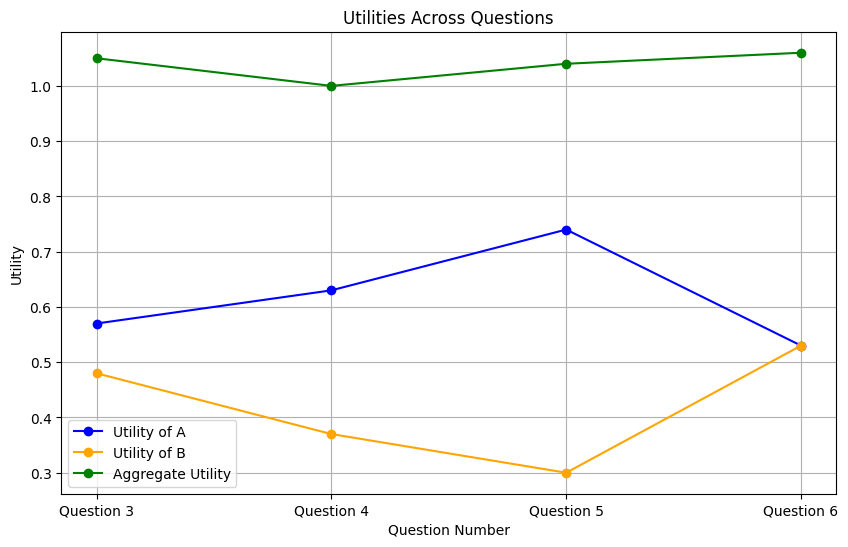

In [10]:
#6.b
# Assign numerical identifiers for each question to be used in plotting.
questions_numbers = np.array([3, 4, 5, 6])

# Create descriptive labels for each question to be displayed on the x-axis.
questions_labels = ['Question 3', 'Question 4', 'Question 5', 'Question 6']

# Store the utility values for consumer A for each question.
uA = np.array([0.57, 0.63, 0.74, 0.53])

# Store the utility values for consumer B for each question.
uB = np.array([0.48, 0.37, 0.3, 0.53])

# Calculate the aggregate utility by adding A's and B's utilities for each question.
uC = uA + uB

# Prepare a plot with specified figure size.
plt.figure(figsize=(10, 6))

# Create a line plot for consumer A's utility, marked with circles at data points.
plt.plot(questions_numbers, uA, '-o', label='Utility of A', color='blue')

# Create a line plot for consumer B's utility, marked with circles at data points.
plt.plot(questions_numbers, uB, '-o', label='Utility of B', color='orange')

# Create a line plot for the aggregate utility, marked with circles at data points.
plt.plot(questions_numbers, uC, '-o', label='Aggregate Utility', color='green')


plt.title('Utilities Across Questions')
plt.xlabel('Question Number')
plt.ylabel('Utility')
plt.xticks(questions_numbers, questions_labels)
plt.grid(True)
plt.legend()
plt.show()




- **Trade-offs Between Utilities**: The graph highlights the trade-offs made between the utilities of Agents A and B across different allocation strategies. In scenarios where Agent A's utility increased, Agent B's utility decreased, and vice versa.
- **Balanced Allocation in Question 6**: The final question shows a more balanced approach, improving Agent B's utility significantly while slightly reducing Agent A's utility but increasing the total aggregate utility.
- **Policy Implications**: These trends can inform policy decisions, emphasizing the importance of balancing individual welfare to achieve equitable and efficient outcomes in resource allocation.

1.5580246795361787
1.1040005052206991
0.9393510380608845
1.4840678465142476
1.3176695348970044
1.166022518501687
0.8655853595616003
0.8865391606997439
0.6016883303365469
0.9761065821277065
1.1290503279257271
0.9347316176536996
0.855671885357146
1.0929780672840494
0.9409438367987882
1.1159154217620797
1.272403811870547
1.0291577841682276
1.2932857393959618
1.3562096744693415
1.1456358957362247
0.8599350721094223
1.2001673676634212
1.7655869867117673
1.1324273442264714
1.2971073206462096
1.0675409687048387
0.9971448840312777
0.8970273976220592
1.2789759077897536
0.7511896433767719
0.7644080814935097
1.3399628906725047
1.0019567031313172
0.5738216422588972
1.6953020185216774
1.6273410783341569
1.1565826545659423
1.262915839579737
0.8169244836570853
1.1797524433677151
1.511537057299963
1.3581435085672078
0.6555998583073317
0.7799357124168762
1.2648692240943633
0.9825817761598408
0.9101043628767183
0.8942777897539916
1.2721280087735243


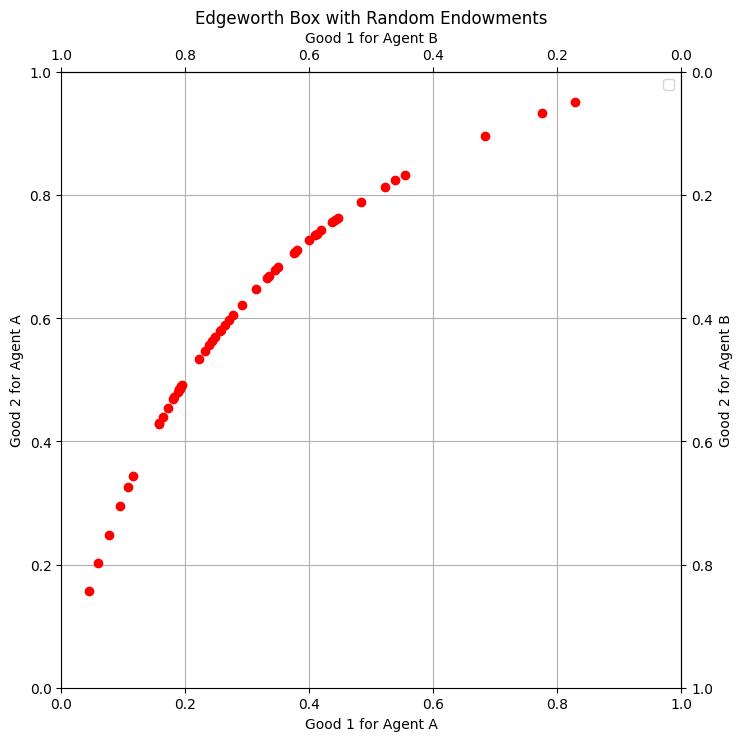

In [19]:
# Set the random seed for reproducibility
np.random.seed(84)

# Generate random endowments
W = np.random.uniform(0, 1, size=(50, 2))

# Define the function to find market equilibrium allocation
def find_equilibrium_allocation(omega_A, omega_B):
    # Define the function to calculate excess demand for good 1
    def excess_demand(p1, omega_A, omega_B):
        x1_A, x2_A = economy.demand_A(p1)
        x1_B, x2_B = economy.demand_B(p1)
        return x1_A + x1_B - omega_A[0] - omega_B[0]

    # Set the endowments in the economy
    economy.par.w1A, economy.par.w2A = omega_A
    economy.par.w1B, economy.par.w2B = omega_B

    # Find market clearing price using fsolve
    market_clearing_price = fsolve(excess_demand, x0=0.8, args=(omega_A, omega_B))[0]
    print(market_clearing_price)

    # Calculate the allocation for A and B at this price
    x1_A_allocation, x2_A_allocation = economy.demand_A(market_clearing_price)
    x1_B_allocation, x2_B_allocation = economy.demand_B(market_clearing_price)

    return (x1_A_allocation, x2_A_allocation), (x1_B_allocation, x2_B_allocation)

# Plot the allocations in the Edgeworth box
plt.figure(figsize=(8, 8))

for omega_A in W:
    omega_B = np.array([1, 1]) - omega_A  # Calculate omega_B
    allocation_A, allocation_B = find_equilibrium_allocation(omega_A, omega_B)
    plt.plot(allocation_A[0], allocation_A[1], 'ro')  # Plot A's allocation
    # plt.plot(allocation_B[0], allocation_B[1], 'bo')  # Plot B's allocation

# Setting up the plot
# Setting up the plot
plt.xlabel('Good 1 for Agent A')
plt.ylabel('Good 2 for Agent A')
plt.title('Edgeworth Box with Random Endowments')
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(0, 1)

# To avoid duplicate labels in the legend, only label the first point and use unique labels for each artist
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

# Adding secondary x-axis with half the ticks and labels
secax_x = plt.gca().secondary_xaxis('top')
secax_x.set_xticks(np.round(np.arange(0, 1.1, 0.2), 2))
secax_x.set_xlabel('Good 1 for Agent B')
secax_x.set_xticklabels(np.round(np.arange(1, -0.1, -0.2), 1))

# Adding secondary y-axis with half the ticks and labels
secax_y = plt.gca().secondary_yaxis('right')
secax_y.set_yticks(np.round(np.arange(0, 1.1, 0.2), 2))
secax_y.set_ylabel('Good 2 for Agent B')
secax_y.set_yticklabels(np.round(np.arange(1, -0.1, -0.2), 1))

plt.show()

plt.show()


The graph successfully demonstrates the equilibrium allocations for Agent A given a range of random endowments. The pattern of the points provides insights into the efficiency and balance of allocations in the economy, highlighting the trade-offs between the goods and the diverse market conditions. 